### 11.09.2024

In [1]:
import pandas as pd

# Sample data
data = {'ID': [1, 2, 2, 3, 4, 4, 5],
        'Name': ['Alice', 'Bob', 'Bob', 'Charlie', 'David', 'David', 'Eve'],
        'Score': [85, 90, 90, 78, 95, 95, 88]}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the data
print("Original DataFrame:")
print(df)

# Identifying exact duplicates (considering all columns)
duplicates = df[df.duplicated()]
print("\nExact Duplicate Rows:")
print(duplicates)

# Removing duplicates (keeping the first occurrence)
df_no_duplicates = df.drop_duplicates()
print("\nDataFrame after Removing Duplicates:")
print(df_no_duplicates)

# If partial duplicates need to be identified (e.g., based on 'ID' only)
partial_duplicates = df[df.duplicated(subset=['ID'])]
print("\nPartial Duplicate Rows (based on 'ID'):")
print(partial_duplicates)

# Removing partial duplicates based on 'ID'
df_no_partial_duplicates = df.drop_duplicates(subset=['ID'])
print("\nDataFrame after Removing Partial Duplicates (based on 'ID'):")
print(df_no_partial_duplicates)

Original DataFrame:
   ID     Name  Score
0   1    Alice     85
1   2      Bob     90
2   2      Bob     90
3   3  Charlie     78
4   4    David     95
5   4    David     95
6   5      Eve     88

Exact Duplicate Rows:
   ID   Name  Score
2   2    Bob     90
5   4  David     95

DataFrame after Removing Duplicates:
   ID     Name  Score
0   1    Alice     85
1   2      Bob     90
3   3  Charlie     78
4   4    David     95
6   5      Eve     88

Partial Duplicate Rows (based on 'ID'):
   ID   Name  Score
2   2    Bob     90
5   4  David     95

DataFrame after Removing Partial Duplicates (based on 'ID'):
   ID     Name  Score
0   1    Alice     85
1   2      Bob     90
3   3  Charlie     78
4   4    David     95
6   5      Eve     88


In [2]:
import pandas as pd

# Example DataFrame
data = {'ID': [1, 2, 3,4], 'Age': ['25', '30', '22','40'], 'Salary': ['50000', '80000', '60000','90000'], 'Joined': ['2021-01-15', '2019-06-30', '2020-07-22','2019-06-30']}
df = pd.DataFrame(data)

# Check data types
print(df.dtypes)


ID         int64
Age       object
Salary    object
Joined    object
dtype: object


In [3]:
# Convert 'Age' and 'Salary' to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
print(df.dtypes)


ID         int64
Age        int64
Salary     int64
Joined    object
dtype: object


In [4]:
# Convert 'Joined' to datetime
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')
print(df.dtypes)



ID                 int64
Age                int64
Salary             int64
Joined    datetime64[ns]
dtype: object


In [5]:

df['Department'] = ['HR', 'Engineering', 'Marketing','CS']
df['Dept_Code'] = df['Department'].astype('category').cat.codes
print(df)


   ID  Age  Salary     Joined   Department  Dept_Code
0   1   25   50000 2021-01-15           HR          2
1   2   30   80000 2019-06-30  Engineering          1
2   3   22   60000 2020-07-22    Marketing          3
3   4   40   90000 2019-06-30           CS          0


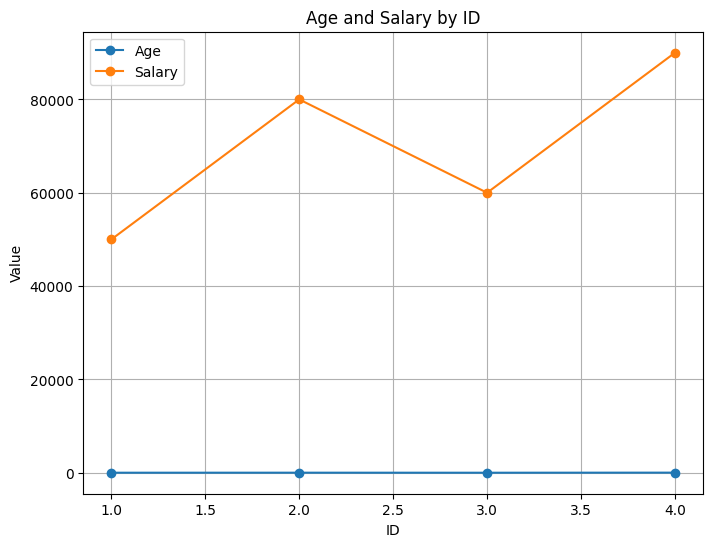

In [6]:
import matplotlib.pyplot as plt

# Creating a line chart for both Age and Salary by ID
plt.figure(figsize=(8, 6))

# Plotting Age
plt.plot(df['ID'], df['Age'], marker='o', label='Age')

# Plotting Salary
plt.plot(df['ID'], df['Salary'], marker='o', label='Salary')

# Adding titles and labels
plt.title('Age and Salary by ID')
plt.xlabel('ID')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.show()



In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Salary_standardized'] = scaler.fit_transform(df[['Salary']])
print(df[['Salary', 'Salary_standardized']])

caler = StandardScaler()
df['Age_standardized'] = scaler.fit_transform(df[['Age']])
print(df[['Age', 'Age_standardized']])

   Salary  Salary_standardized
0   50000            -1.264911
1   80000             0.632456
2   60000            -0.632456
3   90000             1.264911
   Age  Age_standardized
0   25         -0.621997
1   30          0.109764
2   22         -1.061055
3   40          1.573288


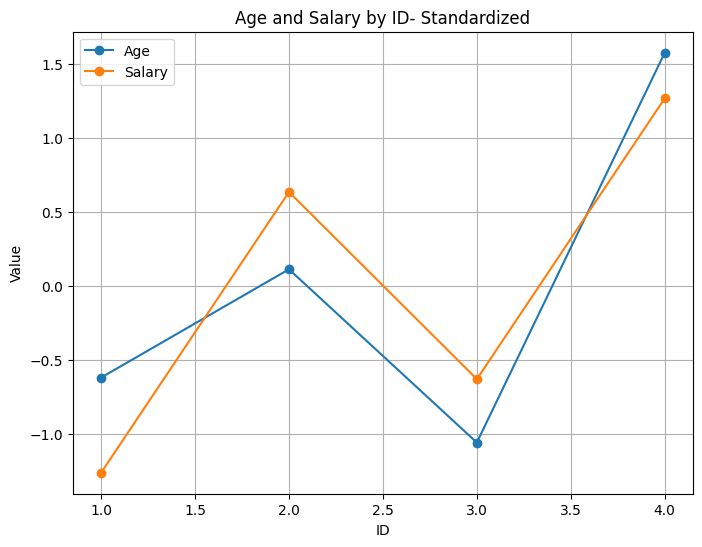

In [10]:
import matplotlib.pyplot as plt

# Creating a line chart for both Age and Salary by ID
plt.figure(figsize=(8, 6))

# Plotting Age
plt.plot(df['ID'], df['Age_standardized'], marker='o', label='Age')

# Plotting Salary
plt.plot(df['ID'], df['Salary_standardized'], marker='o', label='Salary')

# Adding titles and labels
plt.title('Age and Salary by ID- Standardized')
plt.xlabel('ID')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Salary_normalized'] = scaler.fit_transform(df[['Salary']])
print(df[['Salary', 'Salary_normalized']])
df['Age_normalized'] = scaler.fit_transform(df[['Age']])
print(df[['Age', 'Age_normalized']])


   Salary  Salary_normalized
0   50000               0.00
1   80000               0.75
2   60000               0.25
3   90000               1.00
   Age  Age_normalized
0   25        0.166667
1   30        0.444444
2   22        0.000000
3   40        1.000000


In [12]:
import pandas as pd

# Example data
data = {'price': [200, 150, 300, 250], 'quantity': [3, 4, 1, 2], 'date': ['2023-01-10', '2023-02-05', '2023-03-10', '2023-04-02']}
df = pd.DataFrame(data)

# Creating a new feature 'total_sales' from 'price' and 'quantity'
df['total_sales'] = df['price'] * df['quantity']

# Extracting 'year' and 'month' from the 'date'
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

print(df)


   price  quantity       date  total_sales  year  month
0    200         3 2023-01-10          600  2023      1
1    150         4 2023-02-05          600  2023      2
2    300         1 2023-03-10          300  2023      3
3    250         2 2023-04-02          500  2023      4


In [13]:
import pandas as pd
from datetime import datetime

# Sample data
data = {'name': ['Alice', 'Bob', 'Charlie'],
        'date_of_birth': ['1990-05-15', '1985-07-22', '2000-12-30']}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'date_of_birth' column to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Create a new column 'age' by calculating the difference from today's date
df['age'] = df['date_of_birth'].apply(lambda dob: datetime.now().year - dob.year)

# Display the DataFrame
print(df)


      name date_of_birth  age
0    Alice    1990-05-15   34
1      Bob    1985-07-22   39
2  Charlie    2000-12-30   24


In [14]:
import numpy as np
import pandas as pd

# Example data
data = {'price': [200, 150, 300, 250], 'quantity': [3, 4, 1, 2], 'date': ['2023-01-10', '2023-02-05', '2023-03-10', '2023-04-02']}
df = pd.DataFrame(data)

# Creating a new feature 'total_sales' from 'price' and 'quantity'
df['total_sales'] = df['price'] * df['quantity']

# Extracting 'year' and 'month' from the 'date'
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Creating equal-width bins for 'price'
df['price_bins'] = pd.cut(df['price'], bins=3, labels=["Low", "Medium", "High"])

# Creating equal-frequency bins for 'quantity'
df['quantity_bins'] = pd.qcut(df['quantity'], q=3, labels=["Small", "Medium", "Large"])

print(df[['price', 'price_bins', 'quantity', 'quantity_bins']])

   price price_bins  quantity quantity_bins
0    200        Low         3         Large
1    150        Low         4         Large
2    300       High         1         Small
3    250     Medium         2        Medium


In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Example data with categorical variable
df_categorical = pd.DataFrame({'color': ['red', 'blue', 'green', 'blue']})

# Applying One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_categorical[['color']])

# Creating a new DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))

print(encoded_df)

   color_blue  color_green  color_red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0


In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Example data with categorical variable
df_categorical = pd.DataFrame({'color': ['red', 'blue', 'green', 'blue']})

# Applying One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_categorical[['color']])

# Creating a new DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))

print(df_categorical)
print("--------------------------------------------------------------------")
print(encoded_df)


   color
0    red
1   blue
2  green
3   blue
--------------------------------------------------------------------
   color_blue  color_green  color_red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd

# Example data
data = {'price': [200, 150, 300, 250], 'quantity': [3, 4, 1, 2], 'date': ['2023-01-10', '2023-02-05', '2023-03-10', '2023-04-02']}
df = pd.DataFrame(data)

# Creating a new feature 'total_sales' from 'price' and 'quantity'
df['total_sales'] = df['price'] * df['quantity']

# Extracting 'year' and 'month' from the 'date'
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Creating equal-width bins for 'price'
df['price_bins'] = pd.cut(df['price'], bins=3, labels=["Low", "Medium", "High"])

# Creating equal-frequency bins for 'quantity'
df['quantity_bins'] = pd.qcut(df['quantity'], q=3, labels=["Small", "Medium", "Large"])

print(df[['price', 'price_bins', 'quantity', 'quantity_bins']])

# Standardization
scaler = StandardScaler()
df['standardized_sales'] = scaler.fit_transform(df[['total_sales']])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df['scaled_price'] = minmax_scaler.fit_transform(df[['price']])

# Log Transformation (Note: Add 1 to avoid log(0))
df['log_quantity'] = np.log(df['quantity'] + 1)

print(df[['total_sales', 'standardized_sales', 'price', 'scaled_price', 'quantity', 'log_quantity']])

   price price_bins  quantity quantity_bins
0    200        Low         3         Large
1    150        Low         4         Large
2    300       High         1         Small
3    250     Medium         2        Medium
   total_sales  standardized_sales  price  scaled_price  quantity  \
0          600            0.816497    200      0.333333         3   
1          600            0.816497    150      0.000000         4   
2          300           -1.632993    300      1.000000         1   
3          500            0.000000    250      0.666667         2   

   log_quantity  
0      1.386294  
1      1.609438  
2      0.693147  
3      1.098612  
